In [1]:
import numpy as np

samples = ["The cat sat on the mat.", "The dog ate my homework."]

token_index = {}
for sample in samples:
    # 단어 수준의 원핫 인코딩
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

# 샘플에서 max_length 까지의 단어만 사용
max_length = 10

results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [2]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [3]:
import string

samples = ["The cat sat on the mat.", "The dog ate my homework."]
# 출력 가능한 모든 아스키 문자
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters)+1)))

# 샘플에서 max_length 까지의 문자만 사용
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    # 문자 단위의 인코딩
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [4]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [5]:
# keras utility
from tensorflow.keras.preprocessing.text import Tokenizer

# 가장 빈도가 높은 단어 1000개 선택
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

# 문자열을 정수 인덱스 리스트로 변환
sequences = tokenizer.texts_to_sequences(samples)
# 문자열을 원핫 이진 벡터로 변환
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
# 계산된 단어 인덱스
word_index = tokenizer.word_index

In [6]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [7]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [8]:
len(word_index), word_index

(9,
 {'ate': 7,
  'cat': 2,
  'dog': 6,
  'homework': 9,
  'mat': 5,
  'my': 8,
  'on': 4,
  'sat': 3,
  'the': 1})

In [9]:
# 단어를 크기가 1000인 벡터로 저장함 
# 해시 함수에 따라 공간이 넉넉해도 해시 충돌 발생 가능
# 1000개 이상의 단어가 존재하면 해시 충돌이 반드시 발생하여 인코딩의 정확도가 감소함
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [10]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [11]:
results.shape

(2, 10, 1000)

In [12]:
from tensorflow.keras.layers import Embedding

# 토큰의 개수, 임베딩 차원
embedding_layer = Embedding(1000, 64)

In [13]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# 특성으로 사용하는 단어의 수 (가장 빈도수가 높은 1만개의 단어)
max_features = 10000
# 텍스트의 길이 (가장 빈번한 1만개의 단어 중 사용할 길이)
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환
# pad_sequences() 는 패딩을 넣을 위치를 지정 가능
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [14]:
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
# (samples, maxlen, 8) 크기의 텐서를 출력
model.add(Embedding(max_features, 8, input_length=maxlen))
# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼친다
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/10
625/625 - 2s - loss: 0.6760 - acc: 0.6055 - val_loss: 0.6362 - val_acc: 0.6856
Epoch 2/10
625/625 - 1s - loss: 0.5562 - acc: 0.7440 - val_loss: 0.5352 - val_acc: 0.7264
Epoch 3/10
625/625 - 1s - loss: 0.4662 - acc: 0.7839 - val_loss: 0.5036 - val_acc: 0.7436
Epoch 4/10
625/625 - 1s - loss: 0.4229 - acc: 0.8065 - val_loss: 0.4950 - val_acc: 0.7544
Epoch 5/10
625/625 - 1s - loss: 0.3938 - acc: 0.8233 - val_loss: 0.4950 - val_acc: 0.7568
Epoch 6/10
625/625 - 1s - loss: 0.3706 - acc: 0.8378 - val_loss: 0.4986 - val_acc: 0.7570
Epoch 7/10
625/625 - 1s - loss: 0.3497 - acc: 0.8510 - val_loss: 0.5049 - val_acc: 0.7540
Epoch 8/10
625/625 - 1s - loss: 0.3303 - acc: 0.8606 - val_loss: 0.5117 - val_acc: 0.7514
Epoch 9/10
625/625 - 1s - loss: 0.3125 - acc: 0.8707 - val_loss: 0.5194 - val_acc: 0.7516
Epoch 10/10
625/625 - 1s - loss: 0.2949 - acc: 0.8800 - val_loss: 0.5285 - val_acc: 0.7502


In [17]:
!wget http://s3.amazonaws.com/text-datasets/aclImdb.zip

--2021-06-05 14:25:41--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.9.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.9.102|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘aclImdb.zip’

aclImdb.zip         100%[===================>]  57.90M   101MB/s    in 0.6s    

2021-06-05 14:25:42 (101 MB/s) - ‘aclImdb.zip’ saved [60711700/60711700]



In [18]:
!unzip aclImdb.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: __MACOSX/aclImdb/train/pos/._7754_9.txt  
  inflating: aclImdb/train/pos/7755_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: aclImdb/train/pos/7756_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: aclImdb/train/pos/7757_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: aclImdb/train/pos/7758_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: aclImdb/train/pos/7759_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: aclImdb/train/pos/775_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: aclImdb/train/pos/7760_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: aclImdb/train/pos/7761_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7761_10.txt  
  inflating: aclImdb/train/pos/7762_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7762_8.txt  
  inflating:

In [19]:
import os

imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [20]:
len(texts)

25000

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 100개까지지의 단어만 남김
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("%s개의 고유 토큰" % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print("데이터 텐서의 크기:", data.shape)
print("레이블 텐서의 크기:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582개의 고유 토큰
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [22]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-06-05 14:26:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-05 14:26:29--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-05 14:26:30--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [23]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [24]:
glove_dir = '.'

embedding_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()

print("%s개의 벡터를 찾았습니다." % len(embedding_index))

400000개의 벡터를 찾았습니다.


In [25]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [26]:
embedding_matrix[:2]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [27]:
len(embedding_matrix)

10000

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 미리 학습된 가중치를 설정함
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [30]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    verbose=2)
model.save_weights('pre_trained_model.h5')

Epoch 1/10
7/7 - 1s - loss: 2.4856 - acc: 0.5250 - val_loss: 1.0241 - val_acc: 0.5036
Epoch 2/10
7/7 - 1s - loss: 0.6724 - acc: 0.6000 - val_loss: 0.7075 - val_acc: 0.5346
Epoch 3/10
7/7 - 1s - loss: 0.4883 - acc: 0.7600 - val_loss: 1.2102 - val_acc: 0.4968
Epoch 4/10
7/7 - 1s - loss: 0.4106 - acc: 0.7700 - val_loss: 0.9125 - val_acc: 0.5002
Epoch 5/10
7/7 - 1s - loss: 0.2156 - acc: 0.9300 - val_loss: 0.9432 - val_acc: 0.5148
Epoch 6/10
7/7 - 1s - loss: 0.1979 - acc: 0.9150 - val_loss: 1.8482 - val_acc: 0.4966
Epoch 7/10
7/7 - 1s - loss: 0.2563 - acc: 0.9000 - val_loss: 0.7583 - val_acc: 0.5543
Epoch 8/10
7/7 - 1s - loss: 0.0574 - acc: 1.0000 - val_loss: 0.7362 - val_acc: 0.5640
Epoch 9/10
7/7 - 1s - loss: 0.0403 - acc: 1.0000 - val_loss: 0.7776 - val_acc: 0.5628
Epoch 10/10
7/7 - 1s - loss: 0.0254 - acc: 1.0000 - val_loss: 0.8502 - val_acc: 0.5526


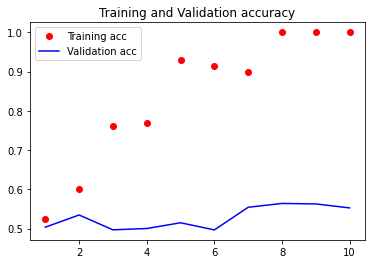

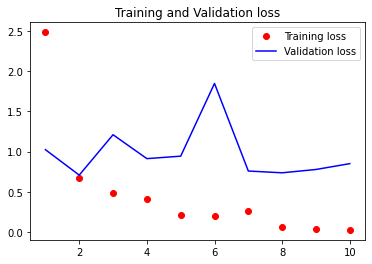

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [32]:
# 사전에 훈련된 단어 임베딩 사용하지 않을 때
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    verbose=2)

Epoch 1/10
7/7 - 1s - loss: 0.6980 - acc: 0.4450 - val_loss: 0.6932 - val_acc: 0.5053
Epoch 2/10
7/7 - 1s - loss: 0.5301 - acc: 0.9650 - val_loss: 0.6988 - val_acc: 0.5052
Epoch 3/10
7/7 - 1s - loss: 0.3266 - acc: 0.9900 - val_loss: 0.6967 - val_acc: 0.5205
Epoch 4/10
7/7 - 1s - loss: 0.1515 - acc: 0.9950 - val_loss: 0.6940 - val_acc: 0.5324
Epoch 5/10
7/7 - 1s - loss: 0.0719 - acc: 1.0000 - val_loss: 0.7071 - val_acc: 0.5254
Epoch 6/10
7/7 - 1s - loss: 0.0383 - acc: 1.0000 - val_loss: 0.7049 - val_acc: 0.5246
Epoch 7/10
7/7 - 1s - loss: 0.0212 - acc: 1.0000 - val_loss: 0.7075 - val_acc: 0.5254
Epoch 8/10
7/7 - 1s - loss: 0.0119 - acc: 1.0000 - val_loss: 0.7149 - val_acc: 0.5236
Epoch 9/10
7/7 - 1s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.7305 - val_acc: 0.5277
Epoch 10/10
7/7 - 1s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.7335 - val_acc: 0.5251


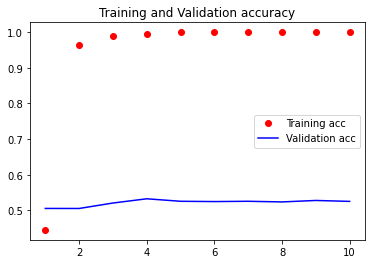

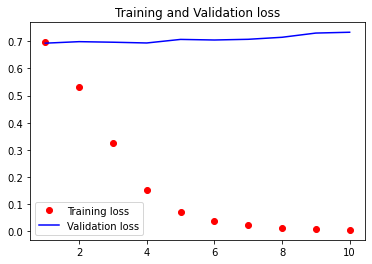

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [34]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [35]:
len(x_test), len(y_test)

(25000, 25000)

In [36]:
x_test[0], len(x_test[0])

(array([ 509,   39,    1, 1162,  207,  255,    3,   93,    5, 4971,    8,
          46, 1003,   44,    9,   13,    3,  705,    2,   33,   66,   54,
         356,   15,    9,   33,  328,  255,    3,   93,   12,   51,   33,
          68, 4734,    3,   26,  572,    5,   27,    8, 1443,   16,    3,
         252,   12,   59,  184, 1928, 1296,    4,  262,   51,    1, 1784,
           8, 2168,    6,    1,  678,   10,  101,   21,   12,  222,  230,
         352,   16, 2519,  136,   18,  130,   33,   94,    1, 3669,    4,
          11,   17,  165, 1677,  328,   85,  222,  161,  331,    5,    1,
          17,   42,  481, 4139,    4,   48,   78,   22,  680,    9,  901,
        1496], dtype=int32), 100)

In [37]:
model.load_weights('pre_trained_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8570 - acc: 0.5527


[0.856990396976471, 0.5526800155639648]